In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
%matplotlib inline
     

In [2]:
df = pd.read_csv('/kaggle/input/mhealth-resampled/mhealth_resampled_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,-0.68636,-5.2902,4.64530,0.13544,-0.83114,-0.13163,-8.4230,-6.6402,2.98050,-0.93922,0.090349,0.219830,0,subject1
1,1.00030,-7.7902,-6.74410,-0.26531,-0.14447,-1.09820,2.2046,-7.5497,4.02880,-0.21961,-1.080100,0.303880,0,subject8
2,1.53220,-9.5966,-0.25618,-0.27273,-0.75985,0.63654,-2.5898,-8.5217,3.83430,-0.88431,-0.848050,0.331900,0,subject2
3,1.78090,-8.5942,-3.97440,-0.41002,-0.55535,-0.78389,-1.0049,-6.8588,2.11540,-0.35686,-0.854210,-0.415950,0,subject4
4,-0.34940,-9.5201,1.45800,-0.68275,-0.77861,-0.24558,-1.4178,-9.5157,1.43050,-0.12353,-0.967150,-0.497840,0,subject3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373190,-2.48730,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-8.2348,-4.9652,2.48090,-0.43725,-1.018500,0.079741,12,subject10
373191,-21.59100,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-21.3180,-10.2130,3.65600,-0.43725,-1.018500,0.079741,12,subject10
373192,7.54330,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-21.2970,-18.7050,4.46060,-0.43725,-1.018500,0.079741,12,subject10
373193,3.01420,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,-21.1380,-18.6980,1.15880,-0.42549,-1.037000,0.084052,12,subject10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373195 entries, 0 to 373194
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       373195 non-null  float64
 1   aly       373195 non-null  float64
 2   alz       373195 non-null  float64
 3   glx       373195 non-null  float64
 4   gly       373195 non-null  float64
 5   glz       373195 non-null  float64
 6   arx       373195 non-null  float64
 7   ary       373195 non-null  float64
 8   arz       373195 non-null  float64
 9   grx       373195 non-null  float64
 10  gry       373195 non-null  float64
 11  grz       373195 non-null  float64
 12  Activity  373195 non-null  int64  
 13  subject   373195 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 39.9+ MB


In [4]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [5]:
df = df.drop(df[df.duplicated(keep = 'first')].index, axis=0)

In [6]:
df.Activity.value_counts()

Activity
1     30720
3     30720
2     30720
4     30720
9     30720
11    30720
5     30720
10    30720
0     29540
7     29441
8     29337
6     28315
12    10342
Name: count, dtype: int64

In [7]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,372735.0,1.770455,4.171677,-22.1460,0.158815,1.36550,2.883200,20.0440
aly,372735.0,-9.128515,5.100531,-19.6190,-10.078000,-9.60640,-7.726200,21.1610
alz,372735.0,-0.726296,6.354113,-19.3730,-3.368250,0.29895,1.759600,25.0150
glx,372735.0,0.090230,0.463354,-1.8942,-0.354360,0.18367,0.484230,1.7941
gly,372735.0,-0.557152,0.427417,-7.7899,-0.810510,-0.69043,-0.493430,2.0038
glz,372735.0,-0.125316,0.554999,-2.6267,-0.571710,-0.11002,0.349710,2.1022
arx,372735.0,-3.478782,5.778589,-22.3450,-5.166500,-2.53390,-0.602910,19.8010
ary,372735.0,-5.783884,6.492916,-18.9720,-9.542600,-7.71190,-2.373100,21.9650
arz,372735.0,2.383707,4.147354,-18.2390,0.138570,1.83100,5.287100,25.7410
grx,372735.0,-0.209434,0.547686,-2.2392,-0.686270,-0.30784,0.252940,3.2588


In [9]:
df1 = df.copy()

In [10]:
df1.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,-0.68636,-5.2902,4.64530,0.13544,-0.83114,-0.13163,-8.4230,-6.6402,2.9805,-0.93922,0.090349,0.21983,0,subject1
1,1.00030,-7.7902,-6.74410,-0.26531,-0.14447,-1.09820,2.2046,-7.5497,4.0288,-0.21961,-1.080100,0.30388,0,subject8
2,1.53220,-9.5966,-0.25618,-0.27273,-0.75985,0.63654,-2.5898,-8.5217,3.8343,-0.88431,-0.848050,0.33190,0,subject2
3,1.78090,-8.5942,-3.97440,-0.41002,-0.55535,-0.78389,-1.0049,-6.8588,2.1154,-0.35686,-0.854210,-0.41595,0,subject4
4,-0.34940,-9.5201,1.45800,-0.68275,-0.77861,-0.24558,-1.4178,-9.5157,1.4305,-0.12353,-0.967150,-0.49784,0,subject3


In [11]:
alx = df1[df1.columns[0]]
aly = df1[df1.columns[1]]
alz = df1[df1.columns[2]]

glx = df1[df1.columns[3]]
gly = df1[df1.columns[4]]
glz = df1[df1.columns[5]]

arx = df1[df1.columns[6]]
ary = df1[df1.columns[7]]
arz = df1[df1.columns[8]]

grx = df1[df1.columns[9]]
gry = df1[df1.columns[10]]
grz = df1[df1.columns[11]]

In [12]:
alx.head()

0   -0.68636
1    1.00030
2    1.53220
3    1.78090
4   -0.34940
Name: alx, dtype: float64

In [13]:
label_y=df1[df1.columns[12]]

In [14]:
label_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Activity, dtype: int64

In [15]:
from scipy import stats
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [16]:
X_alx,y_alx = create_dataset(alx, label_y, 100, step=50)
X_alx.shape, y_alx.shape
X_aly,y_aly = create_dataset(aly, label_y, 100, step=50)
X_aly.shape, y_aly.shape
X_alz,y_alz = create_dataset(alz, label_y, 100, step=50)
X_alz.shape, y_alz.shape

X_glx,y_glx = create_dataset(glx, label_y, 100, step=50)
X_glx.shape, y_glx.shape
X_gly,y_gly = create_dataset(gly, label_y, 100, step=50)
X_gly.shape, y_gly.shape
X_glz,y_glz = create_dataset(glz, label_y, 100, step=50)
X_glz.shape, y_glz.shape

X_arx,y_arx = create_dataset(arx, label_y, 100, step=50)
X_arx.shape, y_arx.shape
X_ary,y_ary = create_dataset(ary, label_y, 100, step=50)
X_ary.shape, y_ary.shape
X_arz,y_arz = create_dataset(arz, label_y, 100, step=50)
X_arz.shape, y_arz.shape

X_grx,y_grx = create_dataset(grx, label_y, 100, step=50)
X_grx.shape, y_grx.shape
X_gry,y_gry = create_dataset(gry, label_y, 100, step=50)
X_gry.shape, y_gry.shape
X_grz,y_grz = create_dataset(grz, label_y, 100, step=50)
X_grz.shape, y_grz.shape

((7453, 100), (7453, 1))

In [17]:
X_grx.shape, y_grx.shape

((7453, 100), (7453, 1))

In [18]:
print(X_alx.shape)
print(X_aly.shape)
print(X_alz.shape)

print(X_glx.shape)
print(X_gly.shape)
print(X_glz.shape)

print(X_arx.shape)
print(X_ary.shape)
print(X_arz.shape)

print(X_grx.shape)
print(X_gry.shape)
print(X_grz.shape)


(7453, 100)
(7453, 100)
(7453, 100)
(7453, 100)
(7453, 100)
(7453, 100)
(7453, 100)
(7453, 100)
(7453, 100)
(7453, 100)
(7453, 100)
(7453, 100)


In [19]:
X_alx_mean=np.mean(X_alx,axis=1)
X_aly_mean=np.mean(X_aly,axis=1)
X_alz_mean=np.mean(X_alz,axis=1)

X_glx_mean=np.mean(X_glx,axis=1)
X_gly_mean=np.mean(X_gly,axis=1)
X_glz_mean=np.mean(X_glz,axis=1)

X_arx_mean=np.mean(X_arx,axis=1)
X_ary_mean=np.mean(X_ary,axis=1)
X_arz_mean=np.mean(X_arz,axis=1)

X_grx_mean=np.mean(X_grx,axis=1)
X_gry_mean=np.mean(X_gry,axis=1)
X_grz_mean=np.mean(X_grz,axis=1)

In [20]:
X_alx_mean.shape

(7453,)

In [21]:
X_alx_mean=X_alx_mean.reshape(7453,1)  #1
X_aly_mean=X_aly_mean.reshape(7453,1)  #2
X_alz_mean=X_alz_mean.reshape(7453,1)  #3

X_glx_mean=X_glx_mean.reshape(7453,1)  #4
X_gly_mean=X_gly_mean.reshape(7453,1)  #5
X_glz_mean=X_glz_mean.reshape(7453,1)  #6

X_arx_mean=X_arx_mean.reshape(7453,1)  #7
X_ary_mean=X_ary_mean.reshape(7453,1)  #8
X_arz_mean=X_arz_mean.reshape(7453,1)  #9

X_grx_mean=X_grx_mean.reshape(7453,1)  #10
X_gry_mean=X_gry_mean.reshape(7453,1)  #11
X_grz_mean=X_grz_mean.reshape(7453,1)  #12

In [22]:
X_alx_std=np.std(X_alx,axis=1) 
X_aly_std=np.std(X_aly,axis=1) 
X_alz_std=np.std(X_alz,axis=1)

X_glx_std=np.std(X_glx,axis=1) 
X_gly_std=np.std(X_gly,axis=1) 
X_glz_std=np.std(X_glz,axis=1)

X_arx_std=np.std(X_arx,axis=1) 
X_ary_std=np.std(X_ary,axis=1) 
X_arz_std=np.std(X_arz,axis=1)

X_grx_std=np.std(X_grx,axis=1) 
X_gry_std=np.std(X_gry,axis=1) 
X_grz_std=np.std(X_grz,axis=1)

In [23]:
X_alx_std.shape

(7453,)

In [24]:
X_alx_std=X_alx_std.reshape(7453,1)  #13
X_aly_std=X_aly_std.reshape(7453,1)  #14
X_alz_std=X_alz_std.reshape(7453,1)  #15

X_glx_std=X_glx_std.reshape(7453,1)  #16
X_gly_std=X_gly_std.reshape(7453,1)  #17
X_glz_std=X_glz_std.reshape(7453,1)  #18

X_arx_std=X_arx_std.reshape(7453,1)  #19
X_ary_std=X_ary_std.reshape(7453,1)  #20
X_arz_std=X_arz_std.reshape(7453,1)  #21

X_grx_std=X_grx_std.reshape(7453,1)  #22
X_gry_std=X_gry_std.reshape(7453,1)  #23
X_grz_std=X_grz_std.reshape(7453,1)  #24

In [25]:
acc_mag_al= np.sqrt(np.square(X_alx)+np.square(X_aly)+np.square(X_aly))
acc_mag_ar= np.sqrt(np.square(X_arx)+np.square(X_ary)+np.square(X_ary))

In [26]:
acc_mag_al.shape, acc_mag_ar.shape

((7453, 100), (7453, 100))

In [27]:
acc_mag_al_mean=np.mean(acc_mag_al,axis=1)  
acc_mag_al_std=np.std(acc_mag_al,axis=1)

acc_mag_ar_mean=np.mean(acc_mag_ar,axis=1)  
acc_mag_ar_std=np.std(acc_mag_ar,axis=1)

In [28]:
acc_mag_al_mean=acc_mag_al_mean.reshape(7453,1)   #25
acc_mag_al_std=acc_mag_al_std.reshape(7453,1)      #26

acc_mag_ar_mean=acc_mag_ar_mean.reshape(7453,1)    #27
acc_mag_ar_std=acc_mag_ar_std.reshape(7453,1)      #28

In [29]:
acc_mag_al_mean.shape, acc_mag_ar_mean.shape

((7453, 1), (7453, 1))

In [30]:
# Importing mean, absolute from numpy 
from numpy import mean, absolute 
#absolute mean deviation
absmean_X_alx=absolute(X_alx - mean(X_alx))
absmean_X_aly=absolute(X_aly - mean(X_aly))
absmean_X_alz=absolute(X_alz - mean(X_alz))

absmean_X_glx=absolute(X_glx - mean(X_glx))
absmean_X_gly=absolute(X_gly - mean(X_gly))
absmean_X_glz=absolute(X_glz - mean(X_glz))

absmean_X_arx=absolute(X_arx - mean(X_arx))
absmean_X_ary=absolute(X_ary - mean(X_ary))
absmean_X_arz=absolute(X_arz - mean(X_arz))

absmean_X_grx=absolute(X_grx - mean(X_grx))
absmean_X_gry=absolute(X_gry - mean(X_gry))
absmean_X_grz=absolute(X_grz - mean(X_grz))

In [31]:
absmean_X_alx_mean=np.mean(absmean_X_alx,axis=1) 
absmean_X_aly_mean=np.mean(absmean_X_aly,axis=1) 
absmean_X_alz_mean=np.mean(absmean_X_alz,axis=1) 

absmean_X_glx_mean=np.mean(absmean_X_glx,axis=1) 
absmean_X_gly_mean=np.mean(absmean_X_gly,axis=1) 
absmean_X_glz_mean=np.mean(absmean_X_glz,axis=1) 

absmean_X_arx_mean=np.mean(absmean_X_arx,axis=1) 
absmean_X_ary_mean=np.mean(absmean_X_ary,axis=1) 
absmean_X_arz_mean=np.mean(absmean_X_arz,axis=1) 

absmean_X_grx_mean=np.mean(absmean_X_grx,axis=1) 
absmean_X_gry_mean=np.mean(absmean_X_gry,axis=1) 
absmean_X_grz_mean=np.mean(absmean_X_grz,axis=1) 


absmean_X_alx_std=np.std(absmean_X_alx,axis=1) 
absmean_X_aly_std=np.std(absmean_X_aly,axis=1) 
absmean_X_alz_std=np.std(absmean_X_alz,axis=1) 

absmean_X_glx_std=np.std(absmean_X_glx,axis=1) 
absmean_X_gly_std=np.std(absmean_X_gly,axis=1) 
absmean_X_glz_std=np.std(absmean_X_glz,axis=1) 

absmean_X_arx_std=np.std(absmean_X_arx,axis=1) 
absmean_X_ary_std=np.std(absmean_X_ary,axis=1) 
absmean_X_arz_std=np.std(absmean_X_arz,axis=1) 

absmean_X_grx_std=np.std(absmean_X_grx,axis=1) 
absmean_X_gry_std=np.std(absmean_X_gry,axis=1) 
absmean_X_grz_std=np.std(absmean_X_grz,axis=1) 



In [32]:
absmean_X_grx_std.shape

(7453,)

In [33]:
absmean_X_alx_mean=absmean_X_alx_mean.reshape(7453,1) #29
absmean_X_aly_mean=absmean_X_aly_mean.reshape(7453,1) #30
absmean_X_alz_mean=absmean_X_alz_mean.reshape(7453,1) #31 

absmean_X_glx_mean=absmean_X_glx_mean.reshape(7453,1) #32
absmean_X_gly_mean=absmean_X_gly_mean.reshape(7453,1) #33
absmean_X_glz_mean=absmean_X_glz_mean.reshape(7453,1) #34

absmean_X_arx_mean=absmean_X_arx_mean.reshape(7453,1) #35
absmean_X_ary_mean=absmean_X_ary_mean.reshape(7453,1) #36
absmean_X_arz_mean=absmean_X_arz_mean.reshape(7453,1) #37

absmean_X_grx_mean=absmean_X_grx_mean.reshape(7453,1) #38
absmean_X_gry_mean=absmean_X_gry_mean.reshape(7453,1) #39
absmean_X_grz_mean=absmean_X_grz_mean.reshape(7453,1) #40


absmean_X_alx_std=absmean_X_alx_std.reshape(7453,1) #41
absmean_X_aly_std=absmean_X_aly_std.reshape(7453,1) #42
absmean_X_alz_std=absmean_X_alz_std.reshape(7453,1) #43

absmean_X_glx_std=absmean_X_glx_std.reshape(7453,1) #44
absmean_X_gly_std=absmean_X_gly_std.reshape(7453,1) #45
absmean_X_glz_std=absmean_X_glz_std.reshape(7453,1) #46

absmean_X_arx_std=absmean_X_arx_std.reshape(7453,1) #47
absmean_X_ary_std=absmean_X_ary_std.reshape(7453,1) #48
absmean_X_arz_std=absmean_X_arz_std.reshape(7453,1) #49

absmean_X_grx_std=absmean_X_grx_std.reshape(7453,1) #50
absmean_X_gry_std=absmean_X_gry_std.reshape(7453,1) #51
absmean_X_grz_std=absmean_X_grz_std.reshape(7453,1) #52

In [34]:
import matplotlib.pyplot as plt
from scipy import signal

spectra_X_alx=np.zeros((7453,51))
spectra_X_aly=np.zeros((7453,51))
spectra_X_alz=np.zeros((7453,51))

spectra_X_arx=np.zeros((7453,51))
spectra_X_ary=np.zeros((7453,51))
spectra_X_arz=np.zeros((7453,51))

freq_X_alx=np.zeros((7453,51))
freq_X_aly=np.zeros((7453,51))
freq_X_alz=np.zeros((7453,51))

freq_X_arx=np.zeros((7453,51))
freq_X_ary=np.zeros((7453,51))
freq_X_arz=np.zeros((7453,51))

In [35]:
for i in range(0,7453):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_X_alx[i], spectra_X_alx[i] = signal.periodogram(X_alx[i], fs=0.50)

    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_X_aly[i], spectra_X_aly[i] = signal.periodogram(X_aly[i], fs=0.50)

    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_X_alz[i], spectra_X_alz[i] = signal.periodogram(X_alz[i], fs=0.50)
    
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_X_arx[i], spectra_X_arx[i] = signal.periodogram(X_arx[i], fs=0.50)

    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_X_ary[i], spectra_X_ary[i] = signal.periodogram(X_ary[i], fs=0.50)

    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_X_arz[i], spectra_X_arz[i] = signal.periodogram(X_arz[i], fs=0.50)

In [36]:
# peak height in the power spectrum is an estimate of the RMS amplitude.
ph_RMS_amp_X_alx = np.sqrt(np.amax(spectra_X_alx,axis=1))
ph_RMS_amp_X_aly = np.sqrt(np.amax(spectra_X_aly,axis=1))
ph_RMS_amp_X_alz = np.sqrt(np.amax(spectra_X_alz,axis=1))

ph_RMS_amp_X_arx = np.sqrt(np.amax(spectra_X_arx,axis=1))
ph_RMS_amp_X_ary = np.sqrt(np.amax(spectra_X_ary,axis=1))
ph_RMS_amp_X_arz = np.sqrt(np.amax(spectra_X_arz,axis=1))

In [37]:
ph_RMS_amp_X_alx.shape

(7453,)

In [38]:
ph_RMS_amp_X_alx = ph_RMS_amp_X_alx.reshape(7453,1) #53
ph_RMS_amp_X_aly = ph_RMS_amp_X_aly.reshape(7453,1) #54
ph_RMS_amp_X_alz = ph_RMS_amp_X_alz.reshape(7453,1) #55

ph_RMS_amp_X_arx = ph_RMS_amp_X_arx.reshape(7453,1) #56
ph_RMS_amp_X_ary = ph_RMS_amp_X_ary.reshape(7453,1) #57
ph_RMS_amp_X_arz = ph_RMS_amp_X_arz.reshape(7453,1) #58

In [39]:
ph_RMS_amp_X_alx.shape

(7453, 1)

In [40]:
spectra_X_glx=np.zeros((7453,51))
spectra_X_gly=np.zeros((7453,51))
spectra_X_glz=np.zeros((7453,51))

spectra_X_grx=np.zeros((7453,51))
spectra_X_gry=np.zeros((7453,51))
spectra_X_grz=np.zeros((7453,51))

freq_X_glx=np.zeros((7453,51))
freq_X_gly=np.zeros((7453,51))
freq_X_glz=np.zeros((7453,51))

freq_X_grx=np.zeros((7453,51))
freq_X_gry=np.zeros((7453,51))
freq_X_grz=np.zeros((7453,51))

In [41]:
for i in range(0,7453):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_X_glx[i], spectra_X_glx[i] = signal.periodogram(X_glx[i], fs=0.50)

    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_X_gly[i], spectra_X_gly[i] = signal.periodogram(X_gly[i], fs=0.50)

    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_X_glz[i], spectra_X_glz[i] = signal.periodogram(X_glz[i], fs=0.50)
    
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_X_grx[i], spectra_X_grx[i] = signal.periodogram(X_grx[i], fs=0.50)

    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_X_gry[i], spectra_X_gry[i] = signal.periodogram(X_gry[i], fs=0.50)

    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_X_grz[i], spectra_X_grz[i] = signal.periodogram(X_grz[i], fs=0.50)

In [42]:
# peak height in the power spectrum is an estimate of the RMS amplitude.
ph_RMS_amp_X_glx = np.sqrt(np.amax(spectra_X_glx,axis=1))
ph_RMS_amp_X_gly = np.sqrt(np.amax(spectra_X_gly,axis=1))
ph_RMS_amp_X_glz = np.sqrt(np.amax(spectra_X_glz,axis=1))

ph_RMS_amp_X_grx = np.sqrt(np.amax(spectra_X_grx,axis=1))
ph_RMS_amp_X_gry = np.sqrt(np.amax(spectra_X_gry,axis=1))
ph_RMS_amp_X_grz = np.sqrt(np.amax(spectra_X_grz,axis=1))

In [43]:
ph_RMS_amp_X_glx.shape

(7453,)

In [44]:
ph_RMS_amp_X_glx = ph_RMS_amp_X_glx.reshape(7453,1)  #59
ph_RMS_amp_X_gly = ph_RMS_amp_X_gly.reshape(7453,1)  #60
ph_RMS_amp_X_glz = ph_RMS_amp_X_glz.reshape(7453,1)  #61

ph_RMS_amp_X_grx = ph_RMS_amp_X_grx.reshape(7453,1)  #62
ph_RMS_amp_X_gry = ph_RMS_amp_X_gry.reshape(7453,1)  #63
ph_RMS_amp_X_grz = ph_RMS_amp_X_grz.reshape(7453,1)  #64

In [45]:
q1_body_X_alx_train=np.zeros((7453,1))
q3_body_X_alx_train=np.zeros((7453,1))

q1_body_X_aly_train=np.zeros((7453,1))
q3_body_X_aly_train=np.zeros((7453,1))

q1_body_X_alz_train=np.zeros((7453,1))
q3_body_X_alz_train=np.zeros((7453,1))

q1_body_X_glx_train=np.zeros((7453,1))
q3_body_X_glx_train=np.zeros((7453,1))

q1_body_X_gly_train=np.zeros((7453,1))
q3_body_X_gly_train=np.zeros((7453,1))

q1_body_X_glz_train=np.zeros((7453,1))
q3_body_X_glz_train=np.zeros((7453,1))


q1_body_X_arx_train=np.zeros((7453,1))
q3_body_X_arx_train=np.zeros((7453,1))

q1_body_X_ary_train=np.zeros((7453,1))
q3_body_X_ary_train=np.zeros((7453,1))

q1_body_X_arz_train=np.zeros((7453,1))
q3_body_X_arz_train=np.zeros((7453,1))

q1_body_X_grx_train=np.zeros((7453,1))
q3_body_X_grx_train=np.zeros((7453,1))

q1_body_X_gry_train=np.zeros((7453,1))
q3_body_X_gry_train=np.zeros((7453,1))

q1_body_X_grz_train=np.zeros((7453,1))
q3_body_X_grz_train=np.zeros((7453,1))

In [46]:
for i in range(0,7453):
    q1_body_X_alx_train[i] = np.percentile(X_alx[i], 25)
    q3_body_X_alx_train[i] = np.percentile(X_alx[i], 75)

    q1_body_X_aly_train[i] = np.percentile(X_aly[i], 25)
    q3_body_X_aly_train[i] = np.percentile(X_aly[i], 75)

    q1_body_X_alz_train[i] = np.percentile(X_alz[i], 25)
    q3_body_X_alz_train[i] = np.percentile(X_alz[i], 75)

    q1_body_X_glx_train[i] = np.percentile(X_glx[i], 25)
    q3_body_X_glx_train[i] = np.percentile(X_glx[i], 75)

    q1_body_X_gly_train[i] = np.percentile(X_gly[i], 25)
    q3_body_X_gly_train[i] = np.percentile(X_gly[i], 75)

    q1_body_X_glz_train[i] = np.percentile(X_glz[i], 25)
    q3_body_X_glz_train[i] = np.percentile(X_glz[i], 75)
    
    
    
    q1_body_X_arx_train[i] = np.percentile(X_arx[i], 25)
    q3_body_X_arx_train[i] = np.percentile(X_arx[i], 75)

    q1_body_X_ary_train[i] = np.percentile(X_ary[i], 25)
    q3_body_X_ary_train[i] = np.percentile(X_ary[i], 75)

    q1_body_X_arz_train[i] = np.percentile(X_arz[i], 25)
    q3_body_X_arz_train[i] = np.percentile(X_arz[i], 75)

    q1_body_X_grx_train[i] = np.percentile(X_grx[i], 25)
    q3_body_X_grx_train[i] = np.percentile(X_grx[i], 75)

    q1_body_X_gry_train[i] = np.percentile(X_gry[i], 25)
    q3_body_X_gry_train[i] = np.percentile(X_gry[i], 75)

    q1_body_X_grz_train[i] = np.percentile(X_grz[i], 25)
    q3_body_X_grz_train[i] = np.percentile(X_grz[i], 75)

In [47]:
print(q1_body_X_alx_train.shape)  #65
print(q3_body_X_alx_train.shape)  #66

print(q1_body_X_aly_train.shape)  #67
print(q3_body_X_aly_train.shape)  #68

print(q1_body_X_alz_train.shape)  #69
print(q3_body_X_alz_train.shape)  #70

print(q1_body_X_glx_train.shape)  #71
print(q3_body_X_glx_train.shape)  #72

print(q1_body_X_gly_train.shape)  #73
print(q3_body_X_gly_train.shape)  #74

print(q1_body_X_glz_train.shape)  #75
print(q3_body_X_glz_train.shape)  #76



print(q1_body_X_arx_train.shape)  #77
print(q3_body_X_arx_train.shape)  #78

print(q1_body_X_ary_train.shape)  #79
print(q3_body_X_ary_train.shape)  #80

print(q1_body_X_arz_train.shape)  #81
print(q3_body_X_arz_train.shape)  #82

print(q1_body_X_grx_train.shape)  #83
print(q3_body_X_grx_train.shape)  #84

print(q1_body_X_gry_train.shape) #85
print(q3_body_X_gry_train.shape) #86

print(q1_body_X_grz_train.shape) #87
print(q3_body_X_grz_train.shape) #88


(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)
(7453, 1)


In [48]:
iqr_X_alx = q3_body_X_alx_train-q1_body_X_alx_train #89
iqr_X_aly = q3_body_X_aly_train-q1_body_X_aly_train #90
iqr_X_alz = q3_body_X_alz_train-q1_body_X_alz_train #91

iqr_X_glx = q3_body_X_glx_train-q1_body_X_glx_train #92
iqr_X_gly = q3_body_X_gly_train-q1_body_X_gly_train #93
iqr_X_glz = q3_body_X_glz_train-q1_body_X_glz_train #94

iqr_X_arx = q3_body_X_arx_train-q1_body_X_arx_train #95
iqr_X_ary = q3_body_X_ary_train-q1_body_X_ary_train #96
iqr_X_arz = q3_body_X_arz_train-q1_body_X_arz_train #97

iqr_X_grx = q3_body_X_grx_train-q1_body_X_grx_train #98
iqr_X_gry = q3_body_X_gry_train-q1_body_X_gry_train #99
iqr_X_grz = q3_body_X_grz_train-q1_body_X_grz_train #100

In [49]:
quartile_dev_X_alx = (iqr_X_alx) / 2 #101
quartile_dev_X_aly = (iqr_X_aly) / 2 #102
quartile_dev_X_alz = (iqr_X_alz) / 2 #103

quartile_dev_X_glx = (iqr_X_glx) / 2 #104
quartile_dev_X_gly = (iqr_X_gly) / 2 #105
quartile_dev_X_glz = (iqr_X_glz) / 2 #106

quartile_dev_X_arx = (iqr_X_arx) / 2 #107
quartile_dev_X_ary = (iqr_X_ary) / 2 #108
quartile_dev_X_arz = (iqr_X_arz) / 2 #109

quartile_dev_X_grx = (iqr_X_grx) / 2 #110
quartile_dev_X_gry = (iqr_X_gry) / 2 #111
quartile_dev_X_grz = (iqr_X_grz) / 2 #112


In [50]:
feature_vector=np.concatenate([X_alx_mean,X_aly_mean,X_alz_mean,X_glx_mean,X_gly_mean,X_glz_mean,
                               X_arx_mean,X_ary_mean,X_arz_mean,X_grx_mean,X_gry_mean,X_grz_mean,
                               X_alx_std,X_aly_std,X_alz_std,X_glx_std,X_gly_std,X_glz_std,
                               X_arx_std,X_ary_std,X_arz_std,X_grx_std,X_gry_std,X_grz_std,
                               acc_mag_al_mean,acc_mag_al_std,acc_mag_ar_mean,acc_mag_ar_std,
                               absmean_X_alx_mean,absmean_X_aly_mean,absmean_X_alz_mean,
                               absmean_X_glx_mean,absmean_X_gly_mean,absmean_X_glz_mean,
                               absmean_X_arx_mean,absmean_X_ary_mean,absmean_X_arz_mean,
                               absmean_X_grx_mean,absmean_X_gry_mean,absmean_X_grz_mean,
                               absmean_X_alx_std,absmean_X_aly_std,absmean_X_alz_std,
                               absmean_X_glx_std,absmean_X_gly_std,absmean_X_glz_std,
                               absmean_X_arx_std,absmean_X_ary_std,absmean_X_arz_std,
                               absmean_X_grx_std,absmean_X_gry_std,absmean_X_grz_std,
                               ph_RMS_amp_X_alx,ph_RMS_amp_X_aly,ph_RMS_amp_X_alz,
                               ph_RMS_amp_X_glx,ph_RMS_amp_X_gly,ph_RMS_amp_X_glz,
                               ph_RMS_amp_X_arx,ph_RMS_amp_X_ary,ph_RMS_amp_X_arz,
                               ph_RMS_amp_X_grx,ph_RMS_amp_X_gry,ph_RMS_amp_X_grz,
                               q1_body_X_alx_train,q1_body_X_aly_train,q1_body_X_alz_train,
                               q1_body_X_glx_train,q1_body_X_gly_train,q1_body_X_glz_train,
                               q1_body_X_arx_train,q1_body_X_ary_train,q1_body_X_arz_train,
                               q1_body_X_grx_train,q1_body_X_gry_train,q1_body_X_grz_train,
                               q3_body_X_alx_train,q3_body_X_aly_train,q3_body_X_alz_train,
                               q3_body_X_glx_train,q3_body_X_gly_train,q3_body_X_glz_train,
                               q3_body_X_arx_train,q3_body_X_ary_train,q3_body_X_arz_train,
                               q3_body_X_grx_train,q3_body_X_gry_train,q3_body_X_grz_train,
                               iqr_X_alx,iqr_X_aly,iqr_X_alz,iqr_X_glx,iqr_X_gly,iqr_X_glz,
                               iqr_X_arx,iqr_X_ary,iqr_X_arz,iqr_X_grx,iqr_X_gry,iqr_X_grz,
                               quartile_dev_X_alx,quartile_dev_X_aly,quartile_dev_X_alz,
                               quartile_dev_X_glx,quartile_dev_X_gly,quartile_dev_X_glz,
                               quartile_dev_X_arx,quartile_dev_X_ary,quartile_dev_X_arz,
                               quartile_dev_X_grx,quartile_dev_X_gry,quartile_dev_X_grz
    ],axis=1)

In [51]:
feature_vector.shape

(7453, 112)

In [52]:
train_X=np.zeros((7453, 112))

In [53]:
for i in range(0,7453):
    train_X[i]= (feature_vector[i] - np.amax(feature_vector[i]) + (feature_vector[i] - np.amin(feature_vector[i])))/(np.amax(feature_vector[i])-np.amin(feature_vector[i]))

In [54]:
train_X.shape

(7453, 112)

In [55]:
phitrain_X=np.arccos(train_X)

In [56]:
phitrain_X.shape

(7453, 112)

In [57]:
import math
import matplotlib.pyplot as plot
def cos_sum(phi_X):
    gasf=np.zeros((112,112))
    for i in range(0,112):
        for j in range(0,112):
            gasf[i][j]= math.cos(phi_X[i]+phi_X[j])
    return gasf

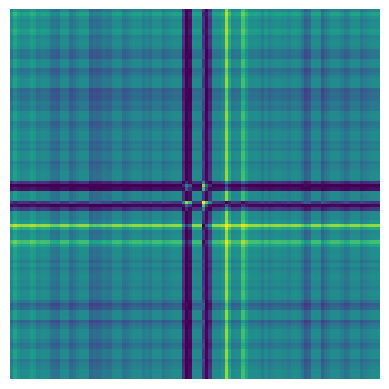

In [58]:
for i in range(7000,7453):
    gasf=cos_sum(phitrain_X[i])
    plot.imshow(gasf)
    plot.axis('off')
    plot.savefig(str(i)+".png",bbox_inches='tight', pad_inches=0)
    #plot.show()